In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


merged_data = pd.read_csv('merged_data_table.csv')
web_data = pd.read_csv('clean_df_web_dataa.csv')

merged_data.head(), web_data.head()


(   Unnamed: 0  client_id  client_tenure_years  client_tenure_months  \
 0           0     836976                  6.0                  73.0   
 1           1    2304905                  7.0                  94.0   
 2           2    1439522                  5.0                  64.0   
 3           3    1562045                 16.0                 198.0   
 4           4    5126305                 12.0                 145.0   
 
    client_age gender  num_accounts    balance  calls_6_months  \
 0        60.5      U           2.0   45105.30             6.0   
 1        58.0      U           2.0  110860.30             6.0   
 2        32.0      U           2.0   52467.79             6.0   
 3        49.0      M           2.0   67454.65             3.0   
 4        33.0      F           2.0  103671.75             0.0   
 
    logons_6_months variation age_group age_range  
 0              9.0      Test      60 >       60+  
 1              9.0   Control     30-60     30-60  
 2          

In [2]:
merged_df = pd.merge(web_data, merged_data[['client_id', 'variation']], on='client_id', how='left')

confirm_counts = merged_df[merged_df['process_step'] == 'confirm'].groupby('variation')['client_id'].nunique()

total_counts = merged_df.groupby('variation')['client_id'].nunique()

completion_rate = confirm_counts / total_counts

completion_rate


variation
Control    0.655785
Test       0.692927
Name: client_id, dtype: float64

In [3]:
web_data['date_time'] = pd.to_datetime(web_data['date_time'])

web_data_sorted = web_data.sort_values(by=['visit_id', 'date_time'])

web_data_sorted['time_spent'] = web_data_sorted.groupby('visit_id')['date_time'].diff()

time_spent_average = web_data_sorted.groupby('process_step')['time_spent'].mean()

time_spent_average


process_step
confirm   0 days 00:02:11.229566330
start     0 days 00:02:41.297419731
step_1    0 days 00:00:39.611460265
step_2    0 days 00:00:45.912095900
step_3    0 days 00:01:40.029564193
Name: time_spent, dtype: timedelta64[ns]

In [5]:
step_order = {'start': 1, 'step_1': 2, 'step_2': 3, 'step_3': 4, 'confirm': 5}
web_data_sorted['step_value'] = web_data_sorted['process_step'].map(step_order)

web_data_sorted['is_backward_step'] = web_data_sorted.groupby('visit_id')['step_value'].diff() < 0

web_data_with_group = pd.merge(web_data_sorted, merged_data[['client_id', 'variation']], on='client_id', how='left')

backward_steps_count = web_data_with_group[web_data_with_group['is_backward_step']].groupby('variation').size()

total_steps_count = web_data_with_group.groupby('variation').size()

error_rate = backward_steps_count / total_steps_count

error_rate


variation
Control    0.069674
Test       0.092980
dtype: float64

In [6]:
web_data_grouped = pd.merge(web_data_sorted, merged_data[['client_id', 'variation']], on='client_id', how='left')

web_data_grouped['time_spent'] = web_data_grouped.groupby(['visit_id'])['date_time'].diff()

web_data_grouped = web_data_grouped[web_data_grouped['time_spent'].notna()]

time_spent_average_grouped = web_data_grouped.groupby(['process_step', 'variation'])['time_spent'].mean()

time_spent_average_grouped


process_step  variation
confirm       Control     0 days 00:02:09.752806276
              Test        0 days 00:02:09.899180844
start         Control     0 days 00:02:58.439155600
              Test        0 days 00:02:33.516606293
step_1        Control     0 days 00:00:43.186200765
              Test        0 days 00:00:37.802243380
step_2        Control     0 days 00:00:38.844171539
              Test        0 days 00:00:48.276524400
step_3        Control     0 days 00:01:34.170056446
              Test        0 days 00:01:37.356887825
Name: time_spent, dtype: timedelta64[ns]

In [7]:
age_distribution = merged_data['client_age'].describe()

tenure_distribution_years = merged_data['client_tenure_years'].describe()

age_distribution, tenure_distribution_years


(count    50487.000000
 mean        47.319795
 std         15.518616
 min         17.000000
 25%         33.500000
 50%         48.000000
 75%         59.500000
 max         96.000000
 Name: client_age, dtype: float64,
 count    50487.000000
 mean        12.031810
 std          6.860326
 min          2.000000
 25%          6.000000
 50%         11.000000
 75%         16.000000
 max         55.000000
 Name: client_tenure_years, dtype: float64)

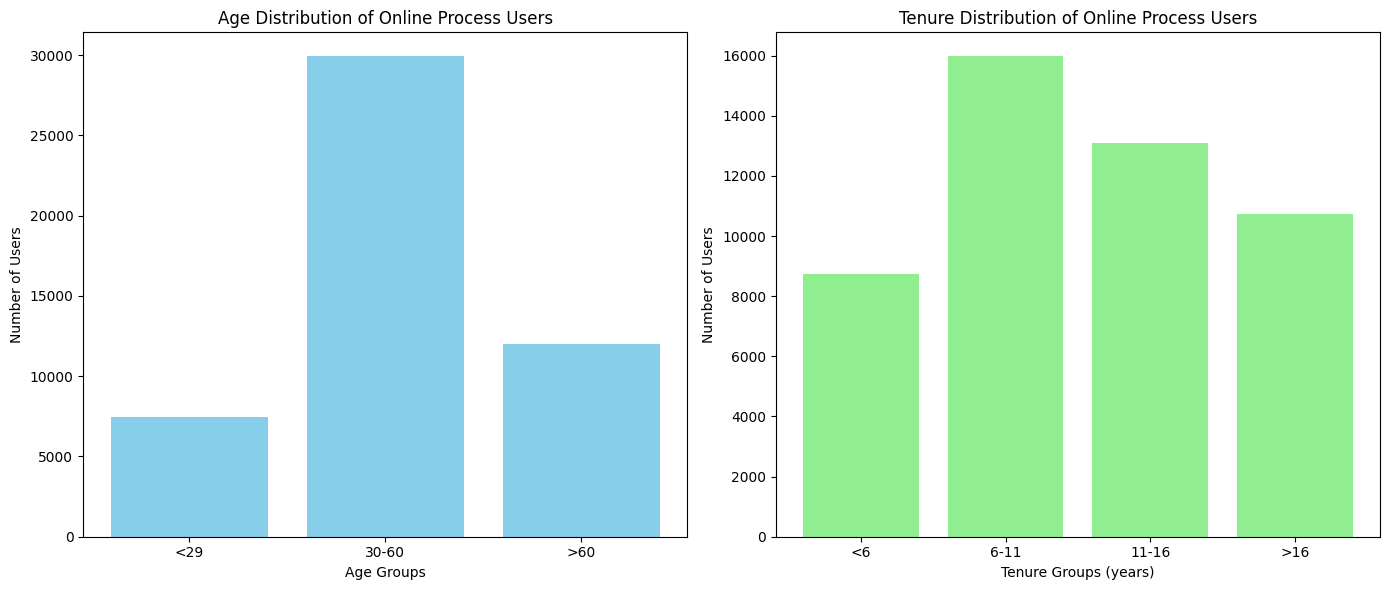

In [8]:
age_categories = ['<29', '30-60', '>60']
age_counts = [
    (merged_data['client_age'] < 29).sum(),
    ((merged_data['client_age'] >= 30) & (merged_data['client_age'] <= 60)).sum(),
    (merged_data['client_age'] > 60).sum()
]
tenure_categories = ['<6', '6-11', '11-16', '>16']
tenure_counts = [
    (merged_data['client_tenure_years'] < 6).sum(),
    ((merged_data['client_tenure_years'] >= 6) & (merged_data['client_tenure_years'] < 11)).sum(),
    ((merged_data['client_tenure_years'] >= 11) & (merged_data['client_tenure_years'] < 16)).sum(),
    (merged_data['client_tenure_years'] > 16).sum()
]
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(age_categories, age_counts, color='skyblue')
ax[0].set_title('Age Distribution of Online Process Users')
ax[0].set_xlabel('Age Groups')
ax[0].set_ylabel('Number of Users')

ax[1].bar(tenure_categories, tenure_counts, color='lightgreen')
ax[1].set_title('Tenure Distribution of Online Process Users')
ax[1].set_xlabel('Tenure Groups (years)')
ax[1].set_ylabel('Number of Users')

plt.tight_layout()
plt.show()


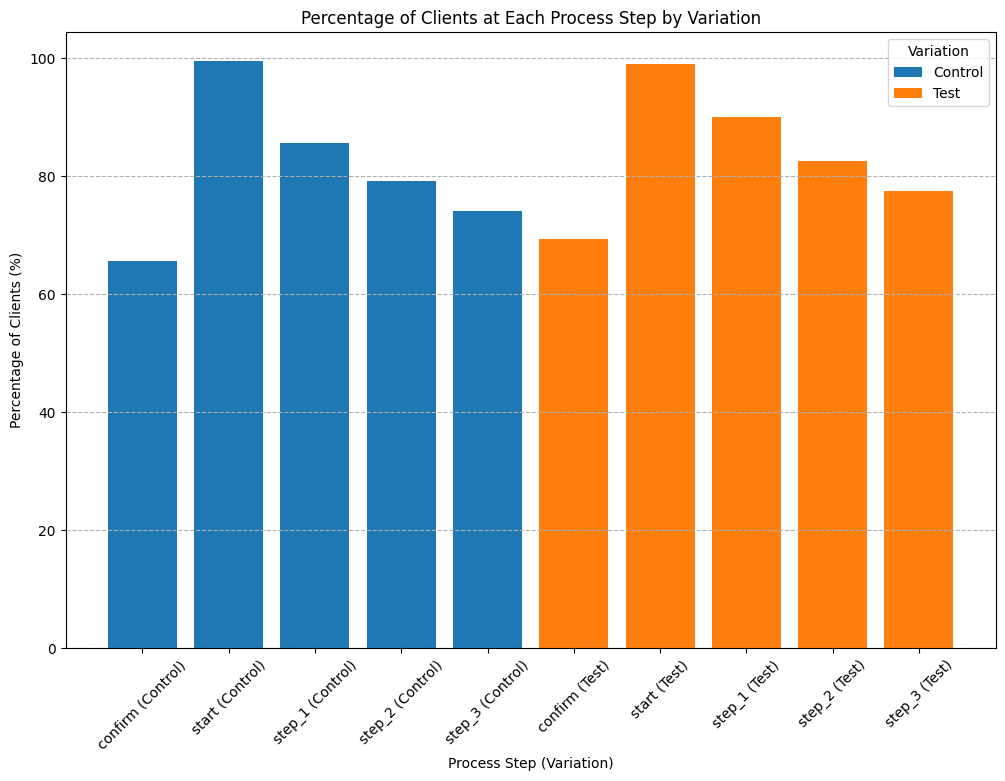

,variation,process_step,Percentage of Clients
0,Control,confirm,65.578509
1,Control,start,99.426167
2,Control,step_1,85.632917
3,Control,step_2,79.248491
4,Control,step_3,74.028734
5,Test,confirm,69.292682
6,Test,start,98.928081
7,Test,step_1,89.981826
8,Test,step_2,82.534031
9,Test,step_3,77.430362


In [68]:
clients_per_step_variation = merged_data.groupby(['variation', 'process_step'])['client_id'].nunique().reset_index(name='Number of Clients')

total_clients_per_variation = merged_data.groupby('variation')['client_id'].nunique().reset_index(name='Total Clients')

clients_per_step_variation = pd.merge(clients_per_step_variation, total_clients_per_variation, on='variation')
clients_per_step_variation['Percentage of Clients'] = (clients_per_step_variation['Number of Clients'] / clients_per_step_variation['Total Clients']) * 100

plt.figure(figsize=(12, 8))
for variation in clients_per_step_variation['variation'].unique():
    subset = clients_per_step_variation[clients_per_step_variation['variation'] == variation]
    plt.bar(subset['process_step'] + ' (' + variation + ')', subset['Percentage of Clients'], label=variation)

plt.xlabel('Process Step (Variation)')
plt.ylabel('Percentage of Clients (%)')
plt.title('Percentage of Clients at Each Process Step by Variation')
plt.xticks(rotation=45)
plt.legend(title='Variation')
plt.grid(axis='y', linestyle='--')

plt.show()

clients_per_step_variation[['variation', 'process_step', 'Percentage of Clients']]


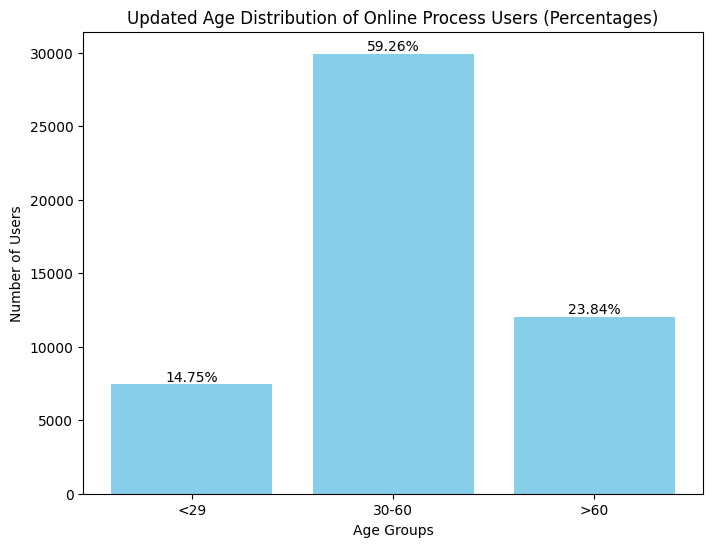

In [9]:
total_users = merged_data['client_age'].count()
age_percentages = [count / total_users * 100 for count in age_counts]

plt.figure(figsize=(8, 6))
bars = plt.bar(age_categories, age_counts, color='skyblue')

for bar, percentage in zip(bars, age_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', 
             ha='center', va='bottom')

plt.title('Updated Age Distribution of Online Process Users (Percentages)')
plt.xlabel('Age Groups')
plt.ylabel('Number of Users')
plt.show()


In [10]:
import pandas as pd

merged_data = pd.read_csv('merged_data_table.csv')
web_data = pd.read_csv('clean_df_web_dataa.csv')

merged_data.head(), web_data.head()


(   Unnamed: 0  client_id  client_tenure_years  client_tenure_months  \
 0           0     836976                  6.0                  73.0   
 1           1    2304905                  7.0                  94.0   
 2           2    1439522                  5.0                  64.0   
 3           3    1562045                 16.0                 198.0   
 4           4    5126305                 12.0                 145.0   
 
    client_age gender  num_accounts    balance  calls_6_months  \
 0        60.5      U           2.0   45105.30             6.0   
 1        58.0      U           2.0  110860.30             6.0   
 2        32.0      U           2.0   52467.79             6.0   
 3        49.0      M           2.0   67454.65             3.0   
 4        33.0      F           2.0  103671.75             0.0   
 
    logons_6_months variation age_group age_range  
 0              9.0      Test      60 >       60+  
 1              9.0   Control     30-60     30-60  
 2          

In [16]:
age_group_distribution = merged_data.groupby(['age_group', 'variation'])['client_id'].count().unstack()

new_clients = merged_data[merged_data['client_tenure_months'] <= 12].groupby('variation')['client_id'].count()
long_standing_clients = merged_data[merged_data['client_tenure_months'] > 12].groupby('variation')['client_id'].count()

age_group_distribution, new_clients, long_standing_clients


(variation  Control   Test
 age_group                
 30-60        13650  15748
 60 >          5941   6617
 < 29          3935   4596,
 Series([], Name: client_id, dtype: int64),
 variation
 Control    23526
 Test       26961
 Name: client_id, dtype: int64)

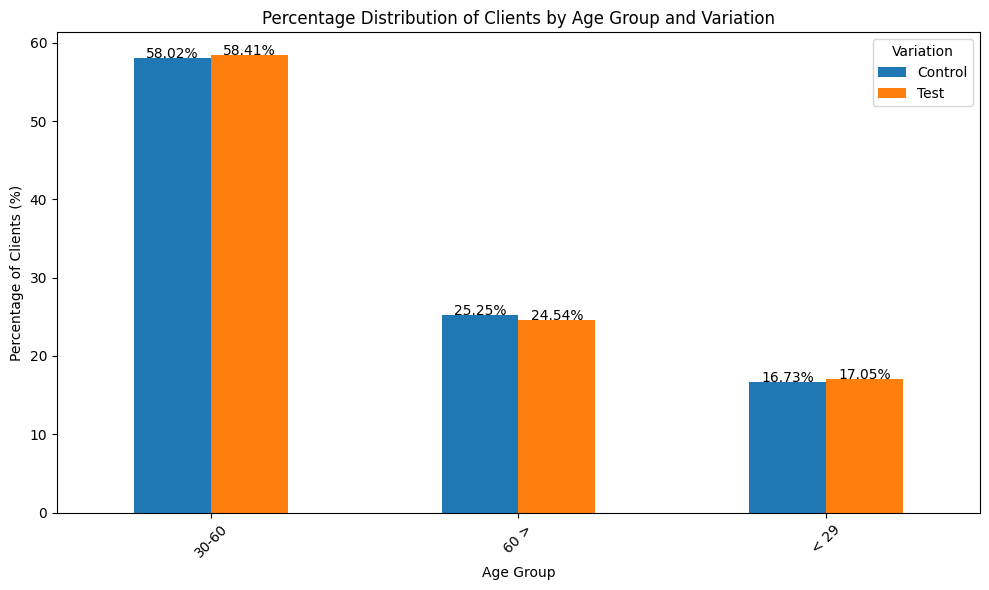

In [17]:
import matplotlib.pyplot as plt

age_group_percentages = age_group_distribution.div(age_group_distribution.sum(axis=0), axis=1) * 100

fig, ax = plt.subplots(figsize=(10, 6))
age_group_percentages.plot(kind='bar', ax=ax)
ax.set_title('Percentage Distribution of Clients by Age Group and Variation')
ax.set_xlabel('Age Group')
ax.set_ylabel('Percentage of Clients (%)')
ax.set_xticklabels(age_group_percentages.index, rotation=45)
ax.legend(title='Variation')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height), ha='center')

plt.tight_layout()
plt.show()


In [18]:
average_logins_by_age_group = merged_data.groupby('age_group')['logons_6_months'].mean()

average_logins_by_age_group


age_group
30-60    5.983842
60 >     6.431597
< 29     6.200680
Name: logons_6_months, dtype: float64

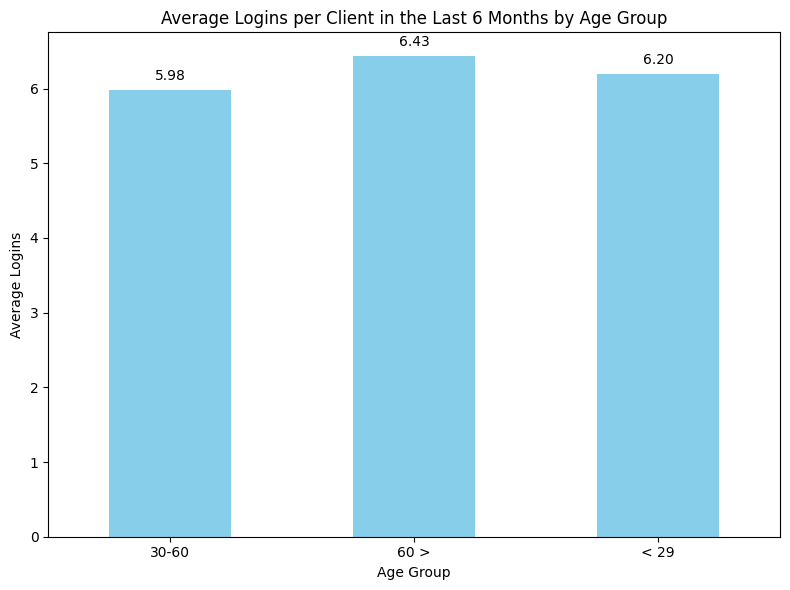

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
average_logins_by_age_group.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Average Logins per Client in the Last 6 Months by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Average Logins')
ax.set_xticklabels(average_logins_by_age_group.index, rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


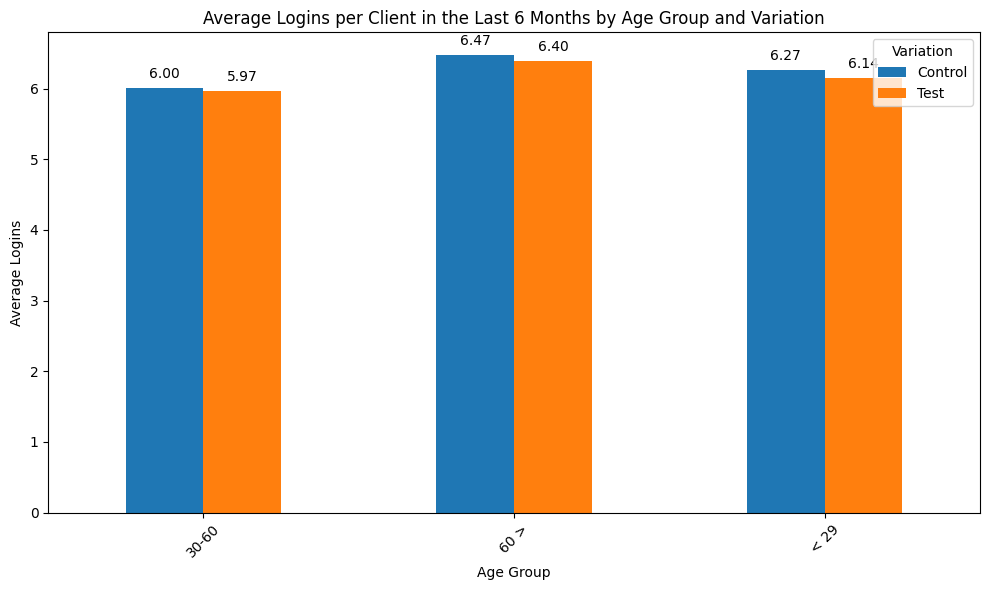

In [20]:
average_logins_by_age_group_variation = merged_data.groupby(['age_group', 'variation'])['logons_6_months'].mean().unstack()

fig, ax = plt.subplots(figsize=(10, 6))
average_logins_by_age_group_variation.plot(kind='bar', ax=ax)
ax.set_title('Average Logins per Client in the Last 6 Months by Age Group and Variation')
ax.set_xlabel('Age Group')
ax.set_ylabel('Average Logins')
ax.set_xticklabels(average_logins_by_age_group_variation.index, rotation=45)
ax.legend(title='Variation')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


In [21]:
merged_df = pd.merge(web_data, merged_data[['client_id', 'variation']], on='client_id', how='left')

confirm_counts = merged_df[merged_df['process_step'] == 'confirm'].groupby('variation')['client_id'].nunique()

total_counts = merged_df.groupby('variation')['client_id'].nunique()

completion_rate = confirm_counts / total_counts

completion_rate


variation
Control    0.655785
Test       0.692927
Name: client_id, dtype: float64

In [22]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

successes = np.array([confirm_counts['Test'], confirm_counts['Control']])
totals = np.array([total_counts['Test'], total_counts['Control']])

z_stat, p_value = proportions_ztest(count=successes, nobs=totals, alternative='two-sided')

z_stat, p_value


(8.89274701899861, 5.961643587721425e-19)

In [17]:
total_counts

variation
Control    23526
Test       26961
Name: client_id, dtype: int64

In [24]:
group_stats_merged = merged_web_data_with_group.groupby('variation').apply(
    lambda df: pd.Series({
        'total_steps': df.shape[0],
        'backward_steps': df['is_backward_step'].sum()
    })
).reset_index()

group_stats_merged['error_rate'] = group_stats_merged['backward_steps'] / group_stats_merged['total_steps']

group_stats_merged[['variation', 'error_rate']]


/var/folders/1n/2qr7zf9x5f53v59q0w3frqrw0000gn/T/ipykernel_16380/3232030184.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_stats_merged = merged_web_data_with_group.groupby('variation').apply(


,variation,error_rate
0,Control,0.069674
1,Test,0.092980


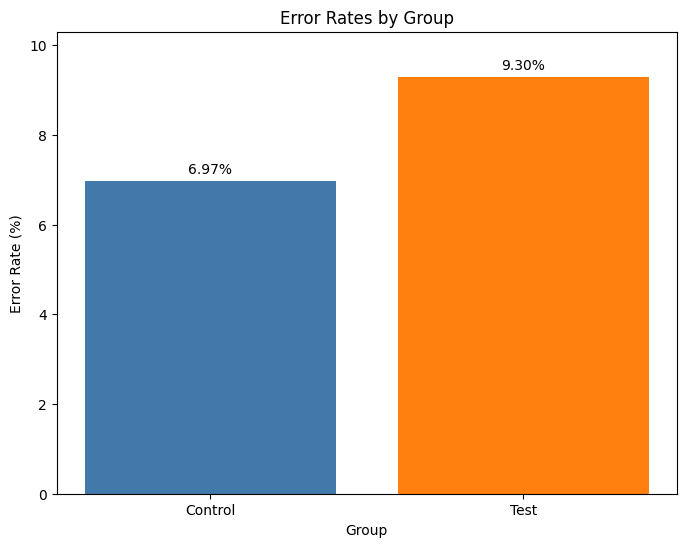

In [25]:
import matplotlib.pyplot as plt

group_stats_merged['error_rate_percent'] = group_stats_merged['error_rate'] * 100

plt.figure(figsize=(8, 6))
barplot = plt.bar(group_stats_merged['variation'], group_stats_merged['error_rate_percent'], color=['#4279AB', '#FF7F0F'])

for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f"{yval:.2f}%", ha='center', va='bottom')

plt.title('Error Rates by Group')
plt.xlabel('Group')
plt.ylabel('Error Rate (%)')
plt.ylim(0, max(group_stats_merged['error_rate_percent']) + 1)  # Adding some space above the highest bar for clarity
plt.show()


In [26]:
age_range_distribution = merged_data['age_range'].value_counts().reset_index()
age_range_distribution.columns = ['Age Range', 'Number of People']

age_range_distribution

,Age Range,Number of People
0,30-60,30483
1,60+,12558
2,13-29,7446


In [32]:
step_variation_counts = merged_df.groupby(['process_step', 'variation']).agg({'client_id': 'nunique'}).reset_index()

variation_total_counts = merged_df.groupby('variation').agg({'client_id': 'nunique'}).reset_index().rename(columns={'client_id': 'total_clients'})

step_variation_percentages = pd.merge(step_variation_counts, variation_total_counts, on='variation', how='left')

step_variation_percentages['percentage'] = (step_variation_percentages['client_id'] / step_variation_percentages['total_clients']) * 100

step_variation_percentages = step_variation_percentages[['process_step', 'variation', 'percentage']].rename(columns={'client_id': 'unique_clients'})

step_variation_percentages

,process_step,variation,percentage
0,confirm,Control,65.578509
1,confirm,Test,69.292682
2,start,Control,99.426167
3,start,Test,98.928081
4,step_1,Control,85.632917
5,step_1,Test,89.981826
6,step_2,Control,79.248491
7,step_2,Test,82.534031
8,step_3,Control,74.028734
9,step_3,Test,77.430362


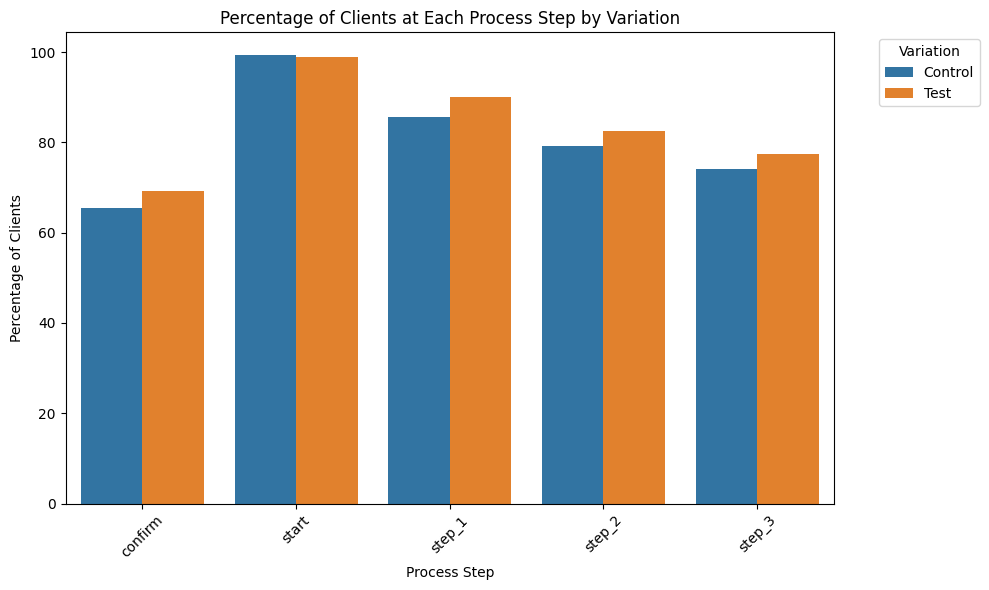

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='process_step', y='percentage', hue='variation', data=step_variation_percentages,
            palette={"Control": "#2077B4", "Test": "#FF7F0F"})
plt.title('Percentage of Clients at Each Process Step by Variation')
plt.xlabel('Process Step')
plt.ylabel('Percentage of Clients')
plt.xticks(rotation=45)
plt.legend(title='Variation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

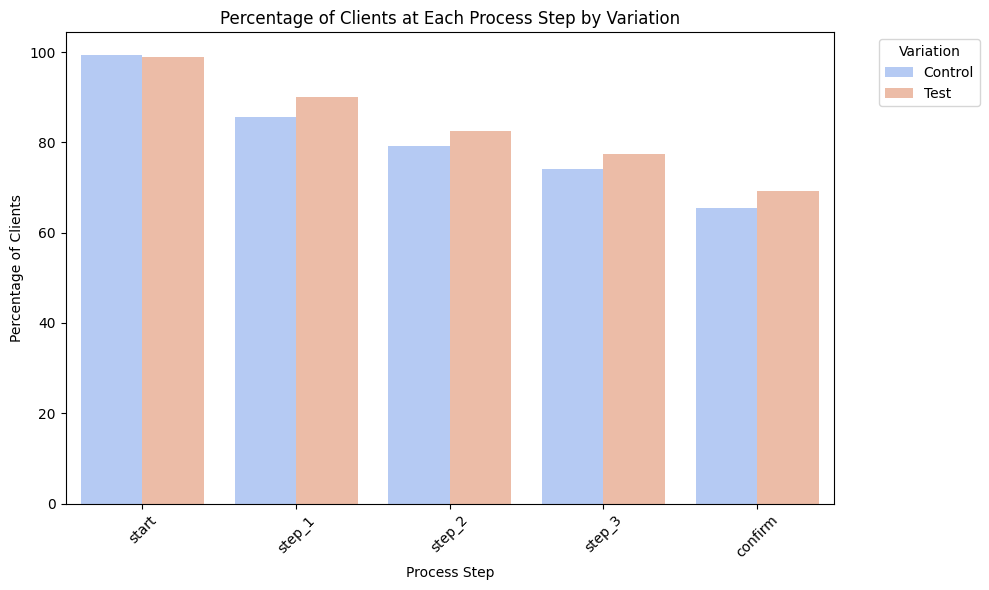

In [35]:
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

step_variation_percentages_ordered = step_variation_percentages.set_index('process_step').loc[step_order].reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='process_step', y='percentage', hue='variation', data=step_variation_percentages_ordered, palette="coolwarm")
plt.title('Percentage of Clients at Each Process Step by Variation')
plt.xlabel('Process Step')
plt.ylabel('Percentage of Clients')
plt.xticks(rotation=45)
plt.legend(title='Variation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

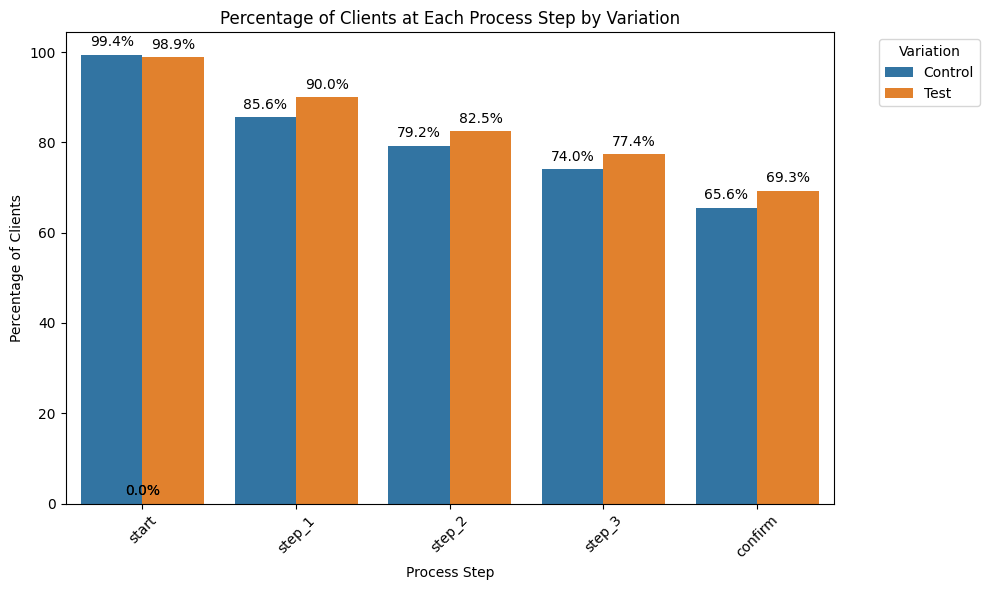

In [27]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='process_step', y='percentage', hue='variation', data=step_variation_percentages_ordered,
            palette={"Control": "#2077B4", "Test": "#FF7F0F"})

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f') + '%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.title('Percentage of Clients at Each Process Step by Variation')
plt.xlabel('Process Step')
plt.ylabel('Percentage of Clients')
plt.xticks(rotation=45)
plt.legend(title='Variation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [41]:
merged_data = web_data.merge(data[['client_id', 'variation']], on='client_id', how='left')

confirm_data = merged_data[merged_data['process_step'] == 'confirm']

confirm_counts = confirm_data.groupby('variation')['client_id'].nunique()

total_counts = merged_data.groupby('variation')['client_id'].nunique()

completion_rates = confirm_counts / total_counts

completion_rates

variation
Control    0.655785
Test       0.692927
Name: client_id, dtype: float64

In [42]:
merged_data['date_time'] = pd.to_datetime(merged_data['date_time'])

merged_data_sorted = merged_data.sort_values(by=['visitor_id', 'visit_id', 'date_time'])

merged_data_sorted['time_diff'] = merged_data_sorted.groupby(['visitor_id', 'visit_id'])['date_time'].diff()

merged_data_sorted['time_diff_seconds'] = merged_data_sorted['time_diff'].dt.total_seconds()

average_time_per_step = merged_data_sorted.groupby(['process_step', 'variation'])['time_diff_seconds'].mean().unstack()

average_time_per_step

variation,Control,Test
process_step,,
confirm,129.752806,129.899181
start,178.439156,153.516606
step_1,43.186201,37.802243
step_2,38.844172,48.276524
step_3,94.170056,97.356888


In [43]:
average_time_per_step_minutes = average_time_per_step / 60

average_time_per_step_minutes


variation,Control,Test
process_step,,
confirm,2.162547,2.164986
start,2.973986,2.558610
step_1,0.719770,0.630037
step_2,0.647403,0.804609
step_3,1.569501,1.622615


In [44]:
step_values = {'start': 1, 'step_1': 2, 'step_2': 3, 'step_3': 4, 'confirm': 5}
merged_data_sorted['step_value'] = merged_data_sorted['process_step'].map(step_values)

merged_data_sorted['is_backward'] = merged_data_sorted.groupby(['visitor_id', 'visit_id'])['step_value'].diff() < 0

step_counts = merged_data_sorted.groupby('variation')['process_step'].count()
backward_counts = merged_data_sorted[merged_data_sorted['is_backward']].groupby('variation')['process_step'].count()

error_rates = backward_counts / step_counts

error_rates

variation
Control    0.069674
Test       0.092980
Name: process_step, dtype: float64

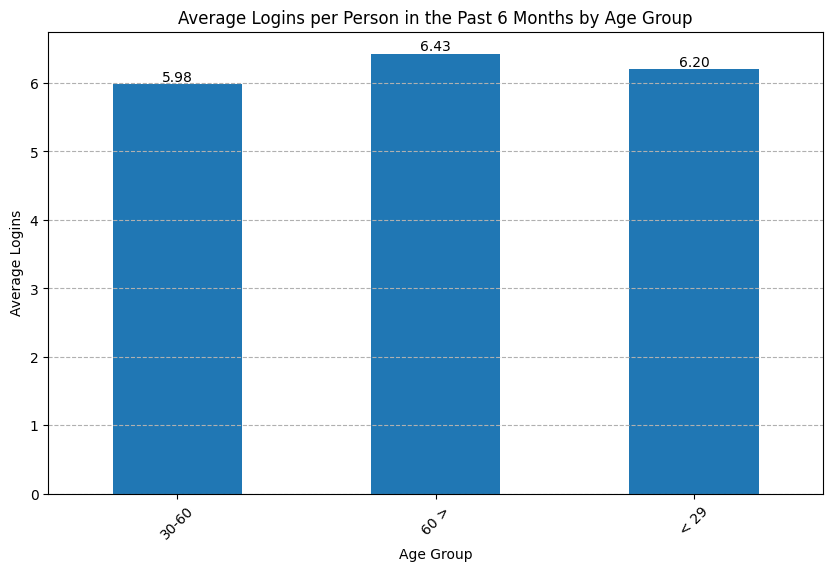

In [43]:
average_logins_by_age_group.plot(kind='bar', figsize=(10, 6), color='#2077B4')

plt.title('Average Logins per Person in the Past 6 Months by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Logins')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

for i, value in enumerate(average_logins_by_age_group):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom')

plt.show()

In [58]:
merged_df['date_time'] = pd.to_datetime(merged_df['date_time'])

merged_df.sort_values(by=['visit_id', 'date_time'], inplace=True)

merged_df['time_spent'] = merged_df.groupby('visit_id')['date_time'].diff()

merged_df['time_spent_seconds'] = merged_df['time_spent'].dt.total_seconds()

merged_df_cleaned = merged_df.dropna(subset=['time_spent_seconds'])

average_time_per_step = merged_df_cleaned.groupby(['process_step', 'variation'])['time_spent_seconds'].mean().unstack()

average_time_per_step

variation,Control,Test
process_step,,
confirm,129.752806,129.899181
start,178.439156,153.516606
step_1,43.186201,37.802243
step_2,38.844172,48.276524
step_3,94.170056,97.356888


In [59]:
step_order = {'start': 1, 'step_1': 2, 'step_2': 3, 'step_3': 4, 'confirm': 5}
merged_df['step_order'] = merged_df['process_step'].map(step_order)

merged_df['step_change'] = merged_df.groupby('visit_id')['step_order'].diff()

merged_df['is_error'] = merged_df['step_change'] < 0

error_counts = merged_df.groupby('variation')['is_error'].sum()
total_steps = merged_df.groupby('variation').size()

error_rate = error_counts / total_steps

error_rate

variation
Control    0.069674
Test       0.092980
dtype: float64

In [61]:
from statsmodels.stats.proportion import proportions_ztest

confirm_counts_values = confirm_counts.values
total_counts_values = total_counts.values

stat, p_value = proportions_ztest(count=confirm_counts_values, nobs=total_counts_values, alternative='two-sided')

stat, p_value

(-8.89274701899861, 5.961643587721425e-19)

In [62]:
adjusted_completion_rate_control = confirm_counts['Control'] / total_counts['Control'] + 0.05

adjusted_confirm_count_control = adjusted_completion_rate_control * total_counts['Control']

stat_threshold, p_value_threshold = proportions_ztest(
    count=[confirm_counts['Test'], adjusted_confirm_count_control],
    nobs=[total_counts['Test'], total_counts['Control']],
    alternative='larger'
)

stat_threshold, p_value_threshold

(-3.1418067344933736, 0.9991604558546691)

In [63]:
from scipy.stats import ttest_ind

test_group_ages = merged_data_table[merged_data_table['variation'] == 'Test']['client_age']
control_group_ages = merged_data_table[merged_data_table['variation'] == 'Control']['client_age']

t_stat, p_value_age = ttest_ind(test_group_ages, control_group_ages)

t_stat, p_value_age

(-2.416145610586789, 0.015689311849750098)

In [76]:
average_age_test = test_group_ages.mean()
average_age_control = control_group_ages.mean()

average_age_test, average_age_control

(47.16392196135158, 47.498427271954434)